# Dijkstra's Algorithim

BFS works when all edges are unweighted (all edges have equal weight), but Dijkstra's works for weighted edges too. 

The 'weight' of an edge is equivalently the 'cost' of traversing that edge. However, when we say cost of a node in this document, we refer to the *cost of the path* from source `A` to that node.

## An aside on BFS: Why does BFS work for finding the shortest path?

The core of BFS is basically:
- at each step, we explore all the neighbour nodes of the frontier nodes previously. These new neighbour nodes will be the new frontier.
- This means at the `kth` step, we explore all nodes that are accessible with `k` steps.

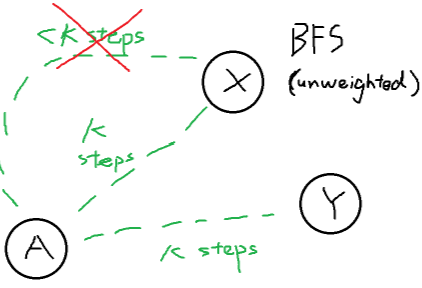

Note that if we have reached node `X` (from `A`) *for the first time* with `k` steps, this is the shortest possible path. This is because if there exists a path to `X` with `<k` steps, we would have already explored that.

However, if the nodes are weighted, there may exist a path with `>k` steps yet still have a lower total cost than the path with `k` steps.

## Dijkstra's Algorithim Explanation

The core of Dijkstra is: **at each step, we visit the node with the lowest cost from source `A`**

We have a `frontier` of nodes, where we know the next lowest-cost node must be within `frontier`. We also have a `shortest` dictionary which stores the shortest path from `A` to this node `{node:shortest_path}`. At each step, we:

- Pop from `frontier` the lowest-cost node
- We will 'visit' this node - add `node:cost of path` to  `shortest`
- Add all of the popped node's neighbours to `frontier`

Initially,

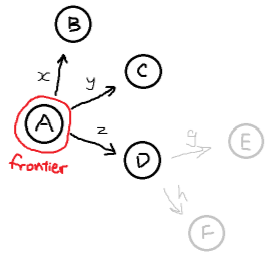

*Next Iteration*

Suppose we want to visit the lowest-cost node from `A`, out of all possible nodes `A` can reach. This *must* be within `A`'s neighbours, as any node not a neighbour will travel a larger cost than the lowest cost node in `B,C,D`. Hence we add 'A's neighbours to `frontier`.

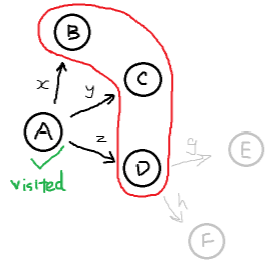

*Next Iteration*

Suppose `z` is the lowest cost out of `x,y,z`. We then pop `D` from  `frontier` and add `D:z` to `shortest`. 
- Out of *all possible nodes* `A` can reach, this first node `D` we pop is also the node we can traverse to with lowest cost!

Suppose we now want to find, out of *all possible nodes* `A` can reach, which node has the next lowest-cost path from `A`? This *must* be either `B,C`, or in the neighbours of `D`. Hence we update `frontier` accordingly by adding `D`'s neighbours `E,F`.

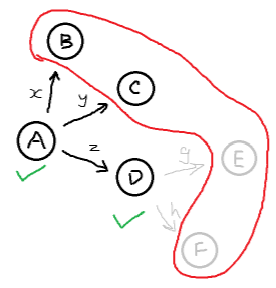

*Next Iteration*

Suppose `z+h` is the lowest cost out of `x,y,z+g,z+h`. We then pop `F` and add `F:z+h` to `shortest`.
- Out of *all possible nodes* `A` can reach, `F` is the second lowest-cost node we can reach!

Add all of `F` neighbours to `frontier` since we know the next lowest-cost node must exist in either the current `frontier` or `F`s neighbours.

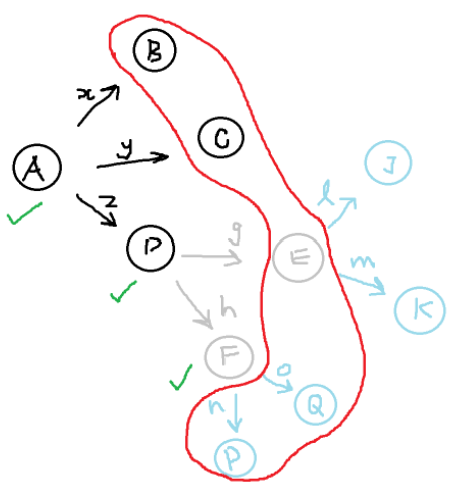

**Why does Dijkstra work?**

Consider the set of *all paths* from source `A` to all nodes, `{'A...B...C...N':x}` where x is the cost of the path from `A` to `N` along that *specific* path.

We can see from above that at each iteration, we 'visit' the node with the lowest-cost path. Hence, we 'visit' nodes in ascending order of cost, like `{'A->C':3,'A->C->E':5 ... }`
- This means that when we 'visit' a node for the *first* time, this must be the shortest possible path to this node.
- When we 'visit' a node with cost `c`, we already have visited all nodes accessible with cost less than `c`!

## Implementation

Since we are always choosing the lowest-cost path/node in the `frontier`, a min-heap will be best here. Each element in `min-heap` will contain the node letter and cost associated with going there (from source to that node).

> notice cost is the first element in the tuple because we want to sort the min-heap by cost

Since we are optimizing for shortest path, we may add the same node many times into `frontier` but note that the first time we add a node to `shortest` is the shortest path for that node.

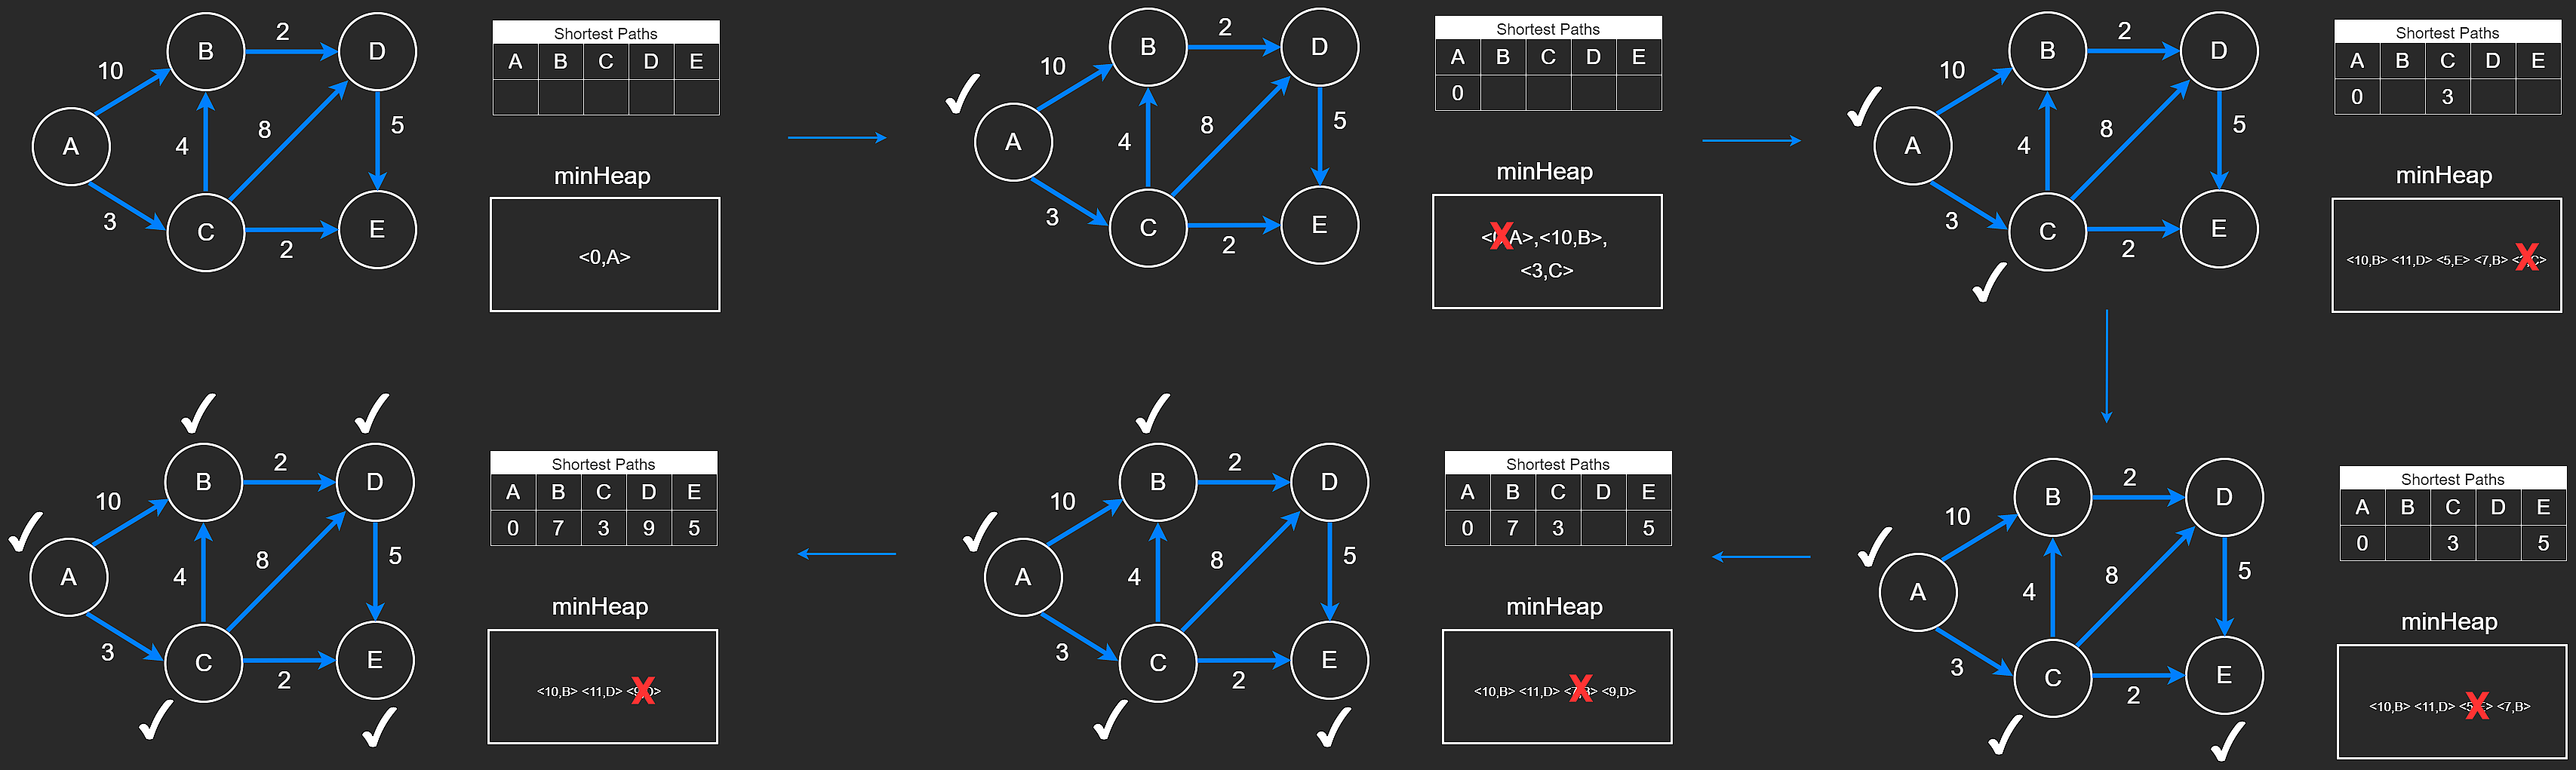

- Firstly given `edges`, we build an adjacency list `adj` to traverse the graph.
- We then use another hashmap `shortest` which contain our nodes and their respective shortest paths
- Initialization is to add `src` to `frontier` with cost `0`

- Then run a for loop until `frontier` is empty
  - At each loop, pop the node from `frontier` with lowest cost
  - Skip this node if we've visited it before (it is in `shortest`)
  - Explore all the neighbours of the popped node
  - Skip this node if we've visited it before (it is in `shortest`)
  - Otherwise, add this neighbour node and the corresponding cost of its path to `frontier`
    - Hence `frontier` actually contains information about the specific path to this node
  

note that in this implementation, if we didnt find a path from source to a node `X`, then `X` simply would not appear in `shortest`


In [ ]:
import heapq

# Given a connected graph represented by a list of edges, where
# edge[0] = src, edge[1] = dst, and edge[2] = weight,
# find the shortest path from src to every other node in the
# graph. There are n nodes in the graph.
# O(E * logV), O(E * logE) is also correct.
def shortestPath(edges, n, src):
    #adjacency list of {node:neighbours}
    adj = {}
    for i in range(1, n + 1):
        adj[i] = []
    # s = src, d = dst, w = weight
    for s, d, w in edges:
        adj[s].append([d, w])

    #this contains {node:shortest_path}
    shortest = {}
    #our heap of [[cost,node]]
    frontier = [[0, src]]
    while frontier:
        #get the minimum cost in our frontier min-heap
        w1, n1 = heapq.heappop(frontier)
        #if 'visited before', don't consider this node
        if n1 in shortest:
            continue
            #add to shortest
        shortest[n1] = w1

        #for each of its neighbours
        for n2, w2 in adj[n1]:
            #if we havent visited before
            if n2 not in shortest:
                #add it to the frontier with the new weight
                heapq.heappush(frontier, [w1 + w2, n2])
    return shortest


## Time Complexity

In the worst cast, we have $E=V^2$ number of edges if every node is connected to all other nodes. In the worst case we also may have every edge inside our `frontier` heap. Worst case insertion/removal for a heap is $logn$, hence our total complexity is $O(E*logE)$

## Important Notes

- Dijkstra **cannot** handle negative weights!
- we assumed that there couldn't exist a path to `C` through `A -> B` because `A -> C = 3` and `A -> B = 10`. Knowing that `A -> B` is "heavier" than `A -> C`, a shorter path to `C`, through `B` is not possible under Dijkstra. However, if we had a negative weight then we could indeed have found a path with cost lower than `3`
- For this we will need the Bellman-Ford Shortest Path Algorithim

---

## Practice: Network Delay Time

You are given a network of `n` directed nodes, labeled from `1` to `n`. You are also given `time`s, a list of directed edges where `times[i] = (ui, vi, ti)`.

- `ui` is the source node (an integer from 1 to n)
- `vi` is the target node (an integer from 1 to n)
- `ti` is the time it takes for a signal to travel from the source to the target node (an integer greater than or equal to 0).
You are also given an integer `k`, representing the node that we will send a signal from.

Return the minimum time it takes for all of the n nodes to receive the signal. If it is impossible for all the nodes to receive the signal, return `-1` instead.

*Example:*

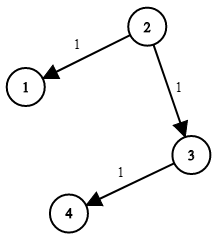

In the first timestep, we reached 1 and 3. In the second timestep, we reached 4. So minimum time is 2.

*Approach*

We solve this problem by considering the property (we 'visit' nodes in ascending order of the cost of path, like `{'A->C':3,'A->C->E':5 ... }`). This means when we visit a node with cost `c`, we have already visited all nodes with cost less than `c`. Hence the problem simply boils down to visiting the last node in our total list of nodes, traversing in a Dijkstra way.

In [ ]:
import collections
class Solution:
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        edges = collections.defaultdict(list)
        for u, v, w in times:
            edges[u].append((v, w))

        #(cost,node)
        minHeap = [(0, k)]
        visit = set()
        t = 0
        while minHeap:
            w1, n1 = heapq.heappop(minHeap)
            if n1 in visit:
                continue
            visit.add(n1)
            t = w1

            for n2, w2 in edges[n1]:
                if n2 not in visit:
                    heapq.heappush(minHeap, (w1 + w2, n2))
        #return t if we've managed to visit every node
        return t if len(visit) == n else -1
